In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
data_california = fetch_california_housing()

In [5]:
data_california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [16]:
dataset = pd.DataFrame(data_california.data,columns= data_california.feature_names)
dataset['Price'] = data_california.target

In [17]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

C:\Users\1996p\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [23]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [24]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [25]:
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [26]:
print(regression.intercept_)

2.0692396089424143


In [27]:
reg_pred=regression.predict(X_test)

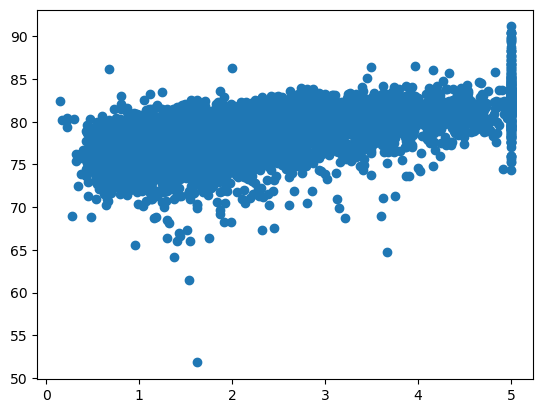

In [28]:
plt.scatter(y_test,reg_pred)

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

76.19524225672092
5811.171970927552
76.231043354578


In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

-4426.42430218495


In [31]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-4432.152814948573

In [32]:
import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))